# Support Vector Machines

Support Vector Machine is a versatile algorithm that can be applied to linear or non-linear datasets. The idea behind support vector machines is to create a decision boundary between classes such that the margins between both classes are maximized. 

If instances are to be strictly imposed off the margins, this is called hard margin classification. However this method is sensitive to outliers and only works if the data is linearly separable. 

Alternatively, soft margin classification can be employed for more flexibility. The idea is to optimize the trade-off between margin violations and keeping the margins large. Allowing some observations to fall on the wrong side of the margin makes the margin 'soft'.
 
# Kernels

The SVM allows us to utilize different transformative kernels which can be used depending on the nature of our dataset. These include linear, polynomial and RBF kernel (among others). The model works best on small to medium scale datasets with high complexity.

**Polynomial Kernel**

For non-linear datasets, sometimes applying quadratic or polynomial transformation can result in a linearly separable dataset. This then allows us to apply linear SVM. However, low polynomial degrees won’t be effective with very complex datasets while high polynomials tend to create numerous features, which can cause a combinatorial explosion thereby reducing model efficiency. 

SVM's apply kernel tricks that allow us to achieve the results produced by polynomial transformations without actually increasing the number of features. 

**Gaussian Radial Basis Function Kernel**

This kernel is particularly useful for overlapping features. The Radial kernel utilizes a similarity metric to establish closely related observations. The smaller the distance the greater the using influence these observations have on each other. The gamma hyperparameter is tweaked to perform regularization.



# SVM Hyperparameters

The C hyperparameter can be tweaked to control the balance between margins and margin violations. Lower values of C leads to wider margins but more margin violations. To the contrary, using a high C value produces a narrow margin and fewer margin violation. Lower values of C increase bias (regularization) while Higher values of C increase variance.


# SVM Pros and Cons


**Pros**

- Highly flexible, particularly due to kernel tricks.

**Cons**

 - Support vector machines expect features to be scaled.
 
 - Inefficient to scale on large datasets.
 
 - Do not provide probability estimates.




# 1. Libraries

In [10]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Import Data
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# 2. Preprocessing

In [3]:
# Create subsets of input features and response variable.
X = dataset.iloc[:, :-1].values
y = dataset['Purchased'].values

# Training and Testing subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 911)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('Standardized feature Mean:',  X_train.mean().round())
print('Standardized feature SD :',   X_train.std().round())

Standardized feature Mean: 0.0
Standardized feature SD : 1.0


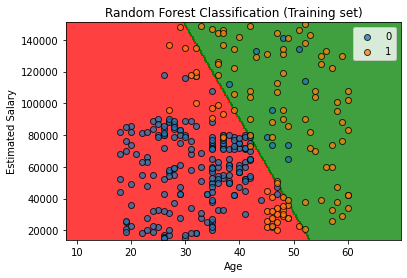

In [4]:
# Training the SVM Classifier
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, y_train)

# Visualising the Training set results
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, svc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], cmap = ListedColormap(('red', 'green'))(i),edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75, label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# 3. Model Evaluation

In [5]:
# Predicting a new result using age 40 and salary 87000
print(svc.predict(sc.transform([[40,87000]])))

# Predicting the Test set results
y_pred = svc.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Classification Accuracy
print('Classification Accuracy :', accuracy_score(y_test, y_pred))

[0]
Classification Accuracy : 0.8125


# 4. K-Fold Cross Validation

In [6]:
# 10 fold cross validation
accuracies = cross_val_score(estimator = svc,
                             X = X,
                             y = y,
                             cv = 3,
                             scoring = 'accuracy')

print(accuracies)
print("Accuracy: {:.3f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.3f} %".format(accuracies.std()*100))

[0.76119403 0.90977444 0.69924812]
Accuracy: 79.007 %
Standard Deviation: 8.834 %


# 5. Hyperparametric Tuning

In [15]:
# Grid Search CV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},]


# Configure GridSearchCV
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)

# Initiate Search
grid_search.fit(X_train, y_train)

# Extract results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print Results
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 92.18 %
Best Parameters: {'C': 1, 'gamma': 0.8, 'kernel': 'rbf'}


In [14]:
# Grid Search CV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},]


# Configure GridSearchCV
random_search = RandomizedSearchCV(estimator = svc,
                           param_distributions = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)

# Initiate Search
random_search.fit(X_train, y_train)

# Extract results
best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_
best_estimator = random_search.best_estimator_

# Print Results
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 92.18 %
Best Parameters: {'kernel': 'rbf', 'gamma': 0.9, 'C': 1}


# 6. Evaluation Metrics

In [16]:
# Confusion Matrix
def evaluate_model(grid_search, X_test):
    
    y_pred = svc.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.6, labels=["NEGATIVE", "POSITIVE"])
    plt.yticks(ticks=np.arange(2) + 0.6, labels=["NEGATIVE", "POSITIVE"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)
    
    
    # ROC/AUC Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, c = 'green', linewidth = 3, alpha = 0.75)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()
    
    
    # Visualising the Testing Results
    X_set, y_set = sc.inverse_transform(X_test), y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                         np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
    plt.contourf(X1, X2, svc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], cmap = ListedColormap(('red', 'green'))(i),edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75, label = j)
    plt.title('Logistic Regression (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

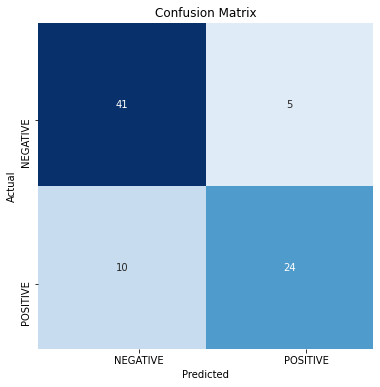

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.80      0.89      0.85        46
    POSITIVE       0.83      0.71      0.76        34

    accuracy                           0.81        80
   macro avg       0.82      0.80      0.80        80
weighted avg       0.81      0.81      0.81        80



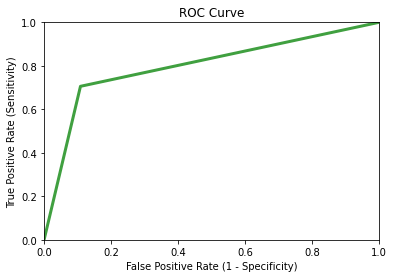

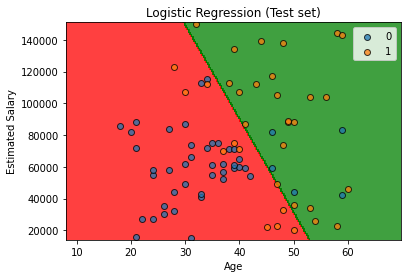

In [17]:
evaluate_model(grid_search, X_test)

# :D